     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - loss: 0.0968 - val_loss: 0.3236
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0824 - val_loss: 0.2602
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0644 - val_loss: 0.1993
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0444 - val_loss: 0.1423
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0305 - val_loss: 0.0885
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0162 - val_loss: 0.0445
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0112 - val_loss: 0.0236
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0124 - val_loss: 0.0207
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0121 - val_loss: 0.0230
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0099 - val_loss: 0.0286
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0089 - val_loss: 0.0295
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0083 - val_loss: 0.0261


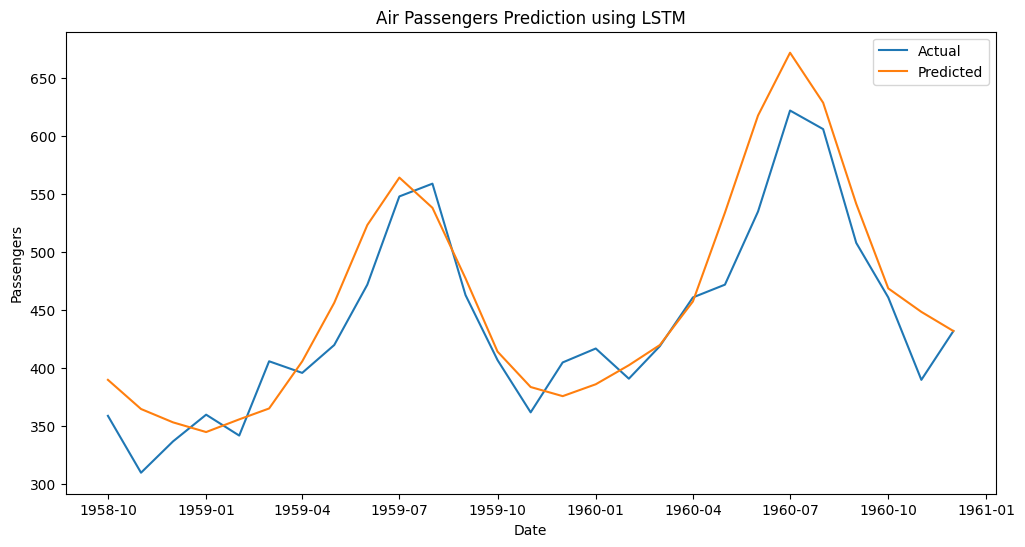

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 2: Load the dataset
data = pd.read_csv('/content/AirPassengers.csv')
print(data.head())

# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Step 3: Normalize the 'Passengers' column
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['#Passengers']])

# Step 4: Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # use past 12 months to predict the next month
X, y = create_sequences(data_scaled, seq_length)

# Step 5: Split into train and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 6: Build the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Step 9: Plot results
plt.figure(figsize=(12,6))
plt.plot(data.index[-len(y_test):], y_test_inv, label='Actual')
plt.plot(data.index[-len(y_test):], y_pred_inv, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.title('Air Passengers Prediction using LSTM')
plt.show()
